## Realest Girl

do a timeline to see who is the realest girl on r/realgirls

things to try:

* a linechart race of karma from realgirls

* we can pick the top 10 girls using subredditstats.com/r/realgirls

* we can pick just posts from last year

In [1]:
# from reddit_summary import redditor_summary
import datetime as dt
import pandas as pd
import numpy as np
import altair as alt

In [ ]:
import praw
import datetime as dt

reddit = praw.Reddit(client_id='your_id', \
                     client_secret='your_client_secret', \
                     user_agent='your_user_agent')

def redditor_summary(redditor, limit=500, verbose=True):
    r = reddit.redditor(redditor)
    r_created = dt.datetime.fromtimestamp(int(r.created_utc))
    if verbose:
        print(f"{redditor} was created {r_created}")
        print(f"comment karma: {r.comment_karma}")
        print(f"post karma: {r.link_karma}")
    r_submissions = pd.DataFrame([vars(post) for post in r.submissions.new(limit=limit)])
    r_comments = pd.DataFrame([vars(comment) for comment in r.comments.new(limit=limit)])
#     display(r_submissions.subreddit.value_counts().head(10))
#     display(r_comments.subreddit.value_counts().head(10))
    summary = pd.concat([rr.subreddit.value_counts().head(10) 
                       for rr in [r_submissions, r_comments]], 
                      names=['post', 'comment'],
                     axis=1)
    summary.columns = ['posts', 'comments']
    summary["total"] = summary.posts + summary.comments
    if verbose:
        display(summary.sort_values('total', ascending=False))
    return (r_submissions, r_comments)

In [2]:
realgirls = [
    "ErinAshford",
#     "cuntnugget-22",
    "SexyFlowerWater",
    "lionessintherain",
    "themotionoftheocean1",
#     "rubiasole628", 
    "secretlittle",
    "Farbootyy",
    "xoxokayla",
    "CosmicCreatures"
]

In [6]:
def load_data(realgirl):
    post, comm = redditor_summary(realgirl, verbose=False)
    rg_posts = post[[sub.display_name == 'RealGirls' for sub in post.subreddit]].copy()
    rg_posts["dt"] = rg_posts.created_utc.apply(dt.datetime.fromtimestamp)
    rg_posts["realgirl"] = realgirl
    return rg_posts[["realgirl", "dt", "score", "upvote_ratio", "gildings", "num_comments", "title", "url"]]

In [7]:
df = pd.concat([load_data(rg) for rg in realgirls])

In [11]:
def filter_july(df):
    return df.set_index("dt")['6/2019':]

In [12]:
chart_df = df.pipe(filter_july)\
    .groupby([pd.Grouper(freq='W'), "realgirl"])\
    .score.sum().unstack().fillna(0).cumsum(axis=0)

chart_df

realgirl,CosmicCreatures,ErinAshford,Farbootyy,SexyFlowerWater,lionessintherain,secretlittle,themotionoftheocean1,xoxokayla
dt,,,,,,,,
2019-07-21,26074.0,26840.0,0.0,0.0,17402.0,0.0,0.0,23906.0
2019-07-28,54079.0,56895.0,0.0,0.0,17402.0,0.0,0.0,41372.0
2019-08-04,55403.0,56895.0,0.0,34179.0,17402.0,0.0,0.0,41372.0
2019-08-11,72728.0,96045.0,0.0,50331.0,17402.0,0.0,0.0,49757.0
2019-08-18,72728.0,96045.0,1747.0,50331.0,40327.0,0.0,0.0,55264.0
...,...,...,...,...,...,...,...,...
2020-11-22,210460.0,835377.0,409442.0,622997.0,396350.0,138531.0,177919.0,185193.0
2020-11-29,210460.0,835377.0,411303.0,622997.0,396350.0,138531.0,177919.0,185193.0
2020-12-06,210460.0,861095.0,415384.0,622997.0,396350.0,138531.0,177919.0,186680.0


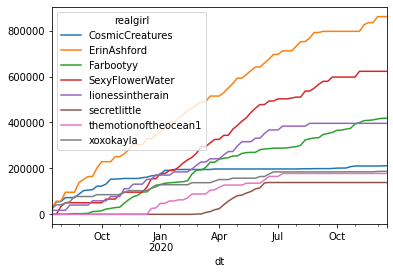

In [16]:
chart_df.plot() # quick check to see what it looks like

In [17]:
import matplotlib.pyplot as plt
import matplotlib as m

In [18]:
# plt.xkcd()
plt.style.use('fast')

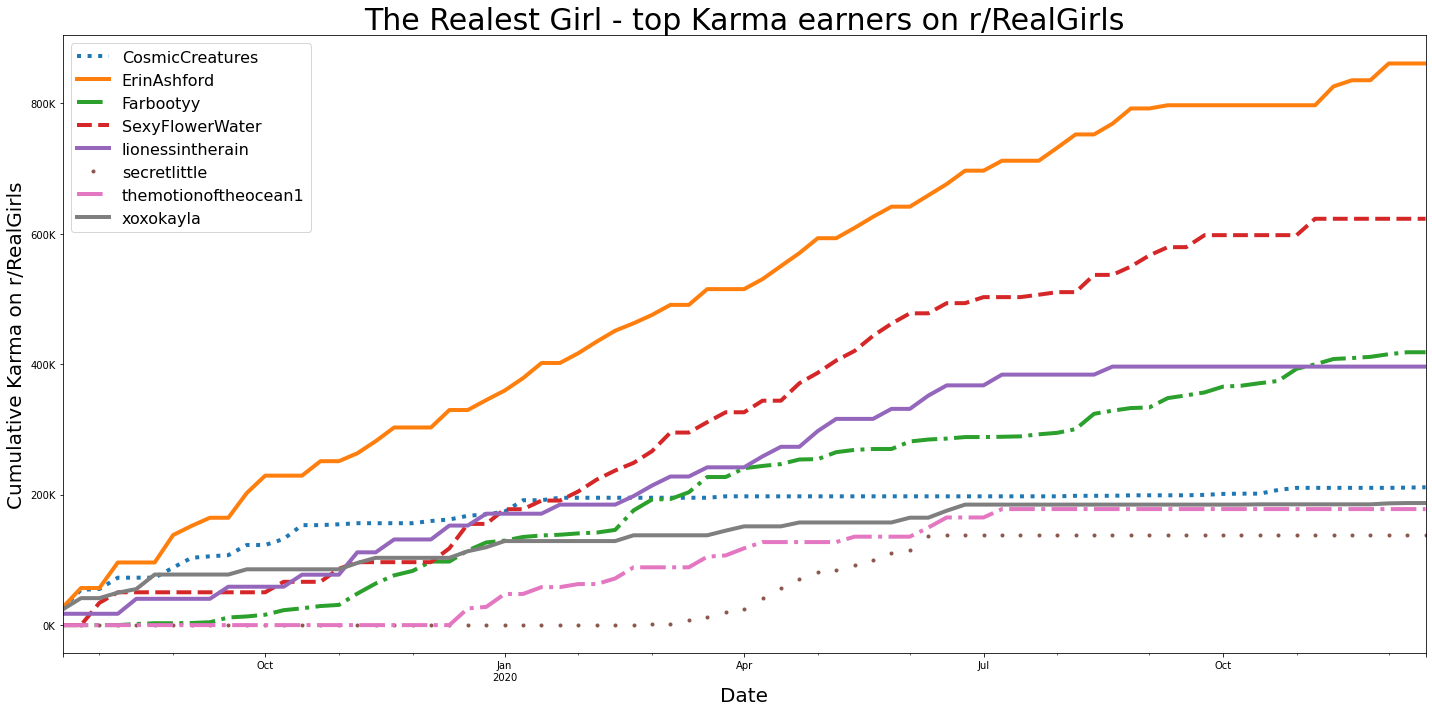

In [19]:
fig, ax = plt.subplots(figsize=(20,10))

linestyle_tuple = [":","-","-.","--","-",".","-."]
ax = chart_df.plot(ax=ax, style=linestyle_tuple, linewidth=4)
plt.ylabel("Cumulative Karma on r/RealGirls", size=20)
ax.set_yticklabels(['{:}K'.format(int(x/1000)) for x in ax.get_yticks().tolist()])
plt.legend(prop={'size': 16})
plt.title("The Realest Girl - top Karma earners on r/RealGirls", size=30)
plt.xlabel("Date", size=20)
plt.tight_layout()
plt.savefig('realest_girl.png')